In [1]:
# Global imports
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import analysis as an

# Connectivity Analysis


In [2]:
from pathlib import Path

data_folder = Path.cwd() / '..' / 'data'
data_folder = data_folder.resolve()
[x for x in sorted(data_folder.iterdir()) if x.is_dir()]

[PosixPath('/home/chwalisz/Code/twist/experiments/wifi-channel/data/2017-12-07-141330'),
 PosixPath('/home/chwalisz/Code/twist/experiments/wifi-channel/data/2017-12-11-122231'),
 PosixPath('/home/chwalisz/Code/twist/experiments/wifi-channel/data/2017-12-11-155541'),
 PosixPath('/home/chwalisz/Code/twist/experiments/wifi-channel/data/2017-12-12-110727'),
 PosixPath('/home/chwalisz/Code/twist/experiments/wifi-channel/data/2017-12-12-111518'),
 PosixPath('/home/chwalisz/Code/twist/experiments/wifi-channel/data/2017-12-12-111553'),
 PosixPath('/home/chwalisz/Code/twist/experiments/wifi-channel/data/2017-12-12-120803'),
 PosixPath('/home/chwalisz/Code/twist/experiments/wifi-channel/data/2017-12-13-122225'),
 PosixPath('/home/chwalisz/Code/twist/experiments/wifi-channel/data/short')]

In [3]:
df = an.get_iperf_folder(data_folder / '2017-12-12-120803', recursive=True)
# df = an.get_iperf_folder(data_folder / '2017-12-12-111553', recursive=True)

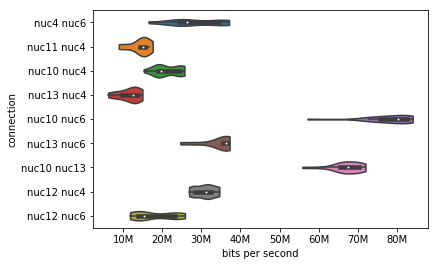

In [4]:
fig, ax = plt.subplots()
sns.violinplot(
    x='bits per second',
    y='connection',
    data=df,
#     hue='mode',
#     split=True,
    cut=0
);
ax.xaxis.set_major_formatter(an.bitrate_formatter)

In [5]:
df.cookie.unique()

array(['nuc6.1513076895.188685.6a968ecc3c0eb',
       'nuc4.1513077282.853218.12b7e5a027bda',
       'nuc4.1513077200.660557.2e6fd69a5cca8',
       'nuc4.1513076944.632141.5e2b8823278e3',
       'nuc4.1513077359.564923.794aff6504fa7',
       'nuc6.1513076974.564635.75324d281a7d4',
       'nuc6.1513077406.039662.20c528101ea8c',
       'nuc13.1513077007.614688.13707f2f2526',
       'nuc10.1513077217.064754.11879a3b6917',
       'nuc12.1513076878.760077.71f973397eb0',
       'nuc10.1513076862.348214.5a0aa4e82f79',
       'nuc10.1513077376.272670.4ffe78281429',
       'nuc6.1513077057.135969.4a3bcdde63eae',
       'nuc12.1513077233.463325.1952b95759c7',
       'nuc4.1513077027.160565.4b0e4c7e282dd'], dtype=object)

# Short measurements

In [14]:
shorts_folder = data_folder / 'short'
short = an.get_iperf_folder(shorts_folder, recursive=False)
short.sort_values(by=['file', 'start'], inplace=True)
print(short.columns)
print(short.cookie.unique())

Index(['ap', 'bits per second', 'bytes', 'channel', 'client', 'connection',
       'cookie', 'end', 'file', 'mode', 'omitted', 'packets', 'phy',
       'retransmits', 'seconds', 'server', 'server bits per second',
       'server bytes', 'server end', 'server jitter ms', 'server lost packets',
       'server lost percent', 'server omitted', 'server packets',
       'server seconds', 'server socket', 'server start', 'snd cwnd', 'socket',
       'sta', 'start', 'timestamp', 'title', 'traffic'],
      dtype='object')
['nuc5.1513155851.815381.08418dff58f49'
 'nuc5.1513156027.391810.7fc7305300fa2'
 'nuc5.1513160810.607668.2060c76b68b34'
 'nuc5.1513162237.499119.170c57c617380'
 'nuc5.1513162836.439874.0f7bced95fda2'
 'nuc5.1513169120.328561.118631b97ff2a'
 'nuc4.1513169244.076307.017c99e3111ff'
 'nuc4.1513169320.311426.5e3b8f2920080'
 'nuc4.1513169464.047935.7ea5bc7a01384'
 'nuc4.1513170629.356701.63e62a8f3e86e'
 'nuc4.1513171139.495362.0a67395248e7e']


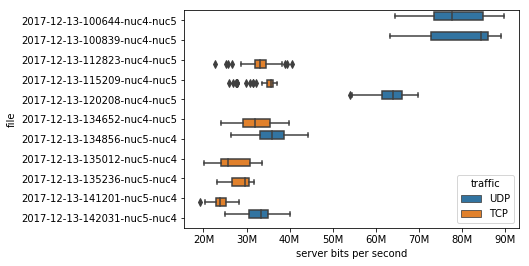

In [15]:
fig, ax = plt.subplots()
sns.boxplot(
    x='server bits per second',
    y='file',
    hue='traffic',
    data=short,
#     cut=0,
);
ax.xaxis.set_major_formatter(an.bitrate_formatter)

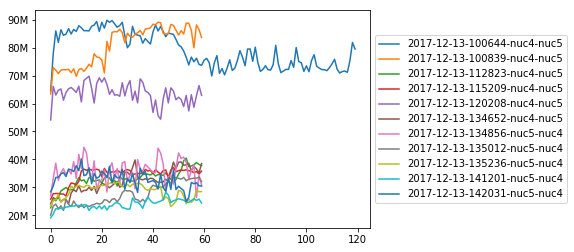

In [23]:
fig, ax = plt.subplots()
short.groupby('file')['server bits per second'].plot(legend=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.yaxis.set_major_formatter(an.bitrate_formatter)